**Brian Blaylock**  
*July 20, 2021*

# NAVGEM Data

There are different products available on the cloud.

In [1]:
from herbie.archive import Herbie
from toolbox.cartopy_tools_OLD import common_features, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
H = Herbie('2021-07-28', 
           model='navgem')

🏋🏻‍♂️ Found 2021-Jul-28 00:00 UTC F00 [NAVGEM] [product=none] GRIB2 file from nomads and index file from None.                                                                                                                                                       


In [6]:
# no index file available. Have to download the full file.
H.download()

👨🏻‍🏭 Created directory: [/p/cwfs/blaylock/data/navgem/20210728]
✅ Success! Downloaded NAVGEM from nomads              
	src: https://nomads.ncep.noaa.gov/pub/data/nccf/com/fnmoc/prod/navgem.20210728/navgem_2021072800f000.grib2
	dst: /p/cwfs/blaylock/data/navgem/20210728/navgem_2021072800f000.grib2


In [8]:
import xarray

In [16]:
# Since we have the full file, we need to filter by keys to open the
# variable we want with cfgrib
x = xarray.open_dataset(
    H.get_localFilePath(), 
    engine='cfgrib', 
    backend_kwargs={'filter_by_keys': {'shortName': '2t',
                                       'typeOfLevel': 'heightAboveGround'}})

Text(0.0, 1.0, 'NAVGEM: ')

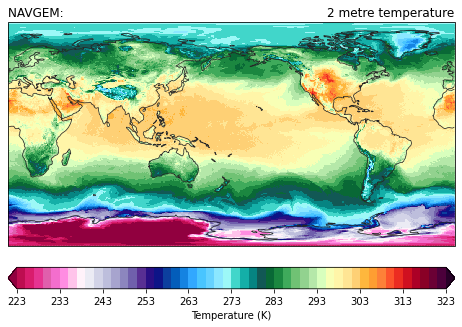

In [18]:
ax = common_features(crs=x.herbie.crs, figsize=[8,8])
p = ax.pcolormesh(x.longitude, x.latitude, x.t2m, 
              transform=pc, 
              **cm_tmp(units='K').cmap_kwargs)
plt.colorbar(p, ax=ax, 
             orientation='horizontal', pad=.05,
             **cm_tmp(units='K').cbar_kwargs)

ax.set_title(x.t2m.GRIB_name, loc='right')
ax.set_title(f"{H.model.upper()}: {H.product_description}", loc='left')